# House Prices

This notebook uses data from the Ames Housing dataset found in a Kaggle competition 
entitled House Prices - Advanced Regression Techniques.  The data set has 79 expanatory variables that 
may be used to predict the price of the home. Key challenges are feature selection and feature engineering.
It is a regression problem with the opportunity to test advanced regression techniques.
https://kaggle.com/competitions/house-prices-advanced-regression-techniques

### Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### Data Access

Kaggle Datasets (missing target for test data)

In [3]:
train_data = pd.read_csv("https://raw.githubusercontent.com/TedMcG7/githubmain/main/datasets/housing-train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/TedMcG7/githubmain/main/datasets/housing-test.csv")

In [4]:
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

### Data Exploration

Data Cleaning

In [5]:
df = train_data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [263]:
def prepare(df):
    clear = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage']
    df = df.drop(clear, axis=1)
    garage_columns = ['GarageType','GarageFinish','GarageQual','GarageCond'] 
    df[garage_columns] = df[garage_columns].fillna('NA')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
    df['GarageYrBlt'] = df['GarageYrBlt'].astype('int64')
    basement_columns =  ['BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']
    df[basement_columns] = df[basement_columns].fillna('NA')
    df['Electrical'] = df['Electrical'].fillna('SBrkr')
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['MedNhbdArea'] = df.groupby('Neighborhood')['GrLivArea'].transform('median').astype('int64')
    qual = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
    df[qual] = df[qual].replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('NA', 0)
    bsmt = ['BsmtFinType1','BsmtFinType2']
    df[bsmt] = df[bsmt].replace('GLQ', 6).replace('ALQ', 5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('NA', 0)
    return df

In [264]:
df = prepare(df)

In [ ]:
# data.hist(bins=50, figsize=(20,15))
# plt.show()

Mutual Information (for feature selection)

In [265]:
from sklearn.feature_selection import mutual_info_regression

In [266]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [267]:
def encode_select(X): 
    for colname in X.select_dtypes('object'):
        X[colname], _ = X[colname].factorize()
    mi_scores = mutual_info_regression(X, y)  
    mi_scores = pd.Series(mi_scores, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    keep = mi_scores[0:50].index.tolist() 
    X = X[keep]
    X = np.ascontiguousarray(X)
    return X

In [268]:
X = encode_select(X)

In [ ]:
# corr = df.corr()['SalePrice'].drop('SalePrice')

In [ ]:
# df_measures = pd.DataFrame({'mi_score': mi_scores, 'corr': corr})

In [ ]:
# df_sorted = df_measures.sort_values('mi_score', ascending=False).reset_index()

In [ ]:
# df_selected = df_sorted.loc[0:50,:]

In [ ]:
# df_selected

In [ ]:
# df = df[df_selected['index']]

Data Visualization - Seaborn

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr())

Data Visualization - Matplotlib

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Data Preparation

In [269]:
X_train = df.drop('SalePrice', axis=1)
y_train = df['SalePrice']

Pipelines

In [270]:
# Transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
# num_attribs = []
# for colname in X_train.select_dtypes('int64','float64'):
#    num_attribs.append(colname)

In [ ]:
# num_attribs

In [ ]:
# cat_attribs = []
# for colname in X_train.select_dtypes('object'):
#    cat_attribs.append(colname)

In [ ]:
# cat_attribs

In [ ]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='error'), cat_attribs),  
    ])

In [271]:
X_train = num_pipeline.fit_transform(X)

In [ ]:
# X = np.ascontiguousarray(X)

### Model Selection

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [273]:
from sklearn.model_selection import cross_val_score

In [274]:
# Testing various classifiers using defaults
from sklearn.model_selection import cross_val_score
regressors = []
regressors.append(LinearRegression())
regressors.append(SVR())
regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())
regressors.append(ExtraTreesRegressor())
regressors.append(GradientBoostingRegressor())
regressors.append(XGBRegressor())


cv_results = []
for regressor in regressors:
    cv_results.append(cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_log_error', cv=5, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'Algorithm':['LinearRegression','SVR','DecisionTree','RandomForest','ExtraTrees',\
                                    'GradientBoosting', 'XGB'],\
                       'Mean':cv_means,"Std": cv_std})


In [275]:
cv_res.head(20).sort_values('Mean', ascending=False)

,Algorithm,Mean,Std
5,GradientBoosting,-0.017136,0.003398
6,XGB,-0.018889,0.001526
4,ExtraTrees,-0.018951,0.003052
3,RandomForest,-0.020805,0.002832
2,DecisionTree,-0.042479,0.004944
1,SVR,-0.159818,0.013224
0,LinearRegression,NaN,NaN


### Model Tuning

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [277]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring = 'neg_mean_squared_log_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Gradient Boosting

In [278]:
gb_reg = GradientBoostingRegressor()
score = cross_val_score(gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
score.mean()

-0.01726232910450437

In [279]:
param_grid = {'n_estimators': [50, 100, 250], 'max_depth': [2, 3, 4], 'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring = 'neg_mean_squared_log_error') 
grid_search.fit(X_train,y_train)
grid_search.best_params_

C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueE

C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\tedmc\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueE

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

In [280]:
grid_search.best_score_

-0.016889834799290328

In [282]:
from sklearn.metrics import mean_squared_log_error

gb_reg = GradientBoostingRegressor(max_depth=1, n_estimators=250, learning_rate=0.1)
gb_reg.fit(X_train,y_train)
y_train_pred = gb_reg.predict(X_train)
score = -1*mean_squared_log_error(y, y_train_pred) 
score

-0.015354840938225065

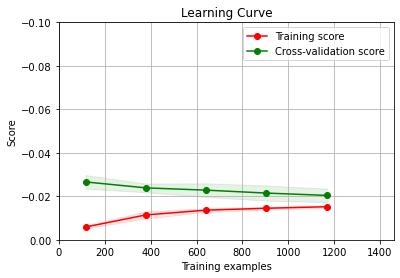

In [283]:
g = plot_learning_curve(gb_reg,"Learning Curve", X_train, y_train)
plt.axis([0, 1460, 0, -.1])                       
plt.show() 

XGB Regressor

In [328]:
xgb_reg = XGBRegressor()
score = cross_val_score(xgb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
score.mean()

-0.018888587911440408

In [329]:
param_grid = {'n_estimators': [200, 250, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring = 'neg_mean_squared_log_error') 
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [330]:
grid_search.best_score_

-0.01624508168444381

In [ ]:
# Explore Randomized Search

In [331]:
xgb_reg = XGBRegressor(max_depth=1, n_estimators=200, learning_rate=.1)
xgb_reg.fit(X_train,y_train)
y_train_pred = xgb_reg.predict(X_train)
score = -1*mean_squared_log_error(y_train, y_train_pred) 
score

-0.01692778995743965

In [332]:
np.sqrt(-score)

0.13010684054821886

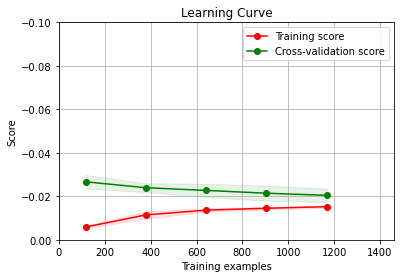

In [333]:
g = plot_learning_curve(gb_reg,"Learning Curve", X_train, y_train)
plt.axis([0, 1460, 0, -.1])                        
plt.show() 

Random Forest

In [290]:
rf_reg = RandomForestRegressor()
score = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring = 'neg_mean_squared_log_error')
score.mean()

-0.020721763653281842

In [310]:
param_grid = {'n_estimators': [600, 700, 800], 'max_depth': [7, 8, 9]}
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring = 'neg_mean_squared_log_error') 
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 600}

In [311]:
grid_search.best_score_

-0.02113253448058331

In [317]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=5)
rf_reg.fit(X_train,y_train)
y_train_pred = rf_reg.predict(X_train)
score = -1*mean_squared_log_error(y_train, y_train_pred) 
score

-0.02054774939427204

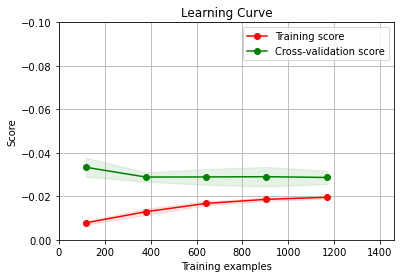

In [318]:
g = plot_learning_curve(rf_reg,"Learning Curve", X_train, y_train)
plt.axis([0, 1460, 0, -.1])                        
plt.show() 

Ensemble

In [321]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(
    estimators=[('gb', gb_reg), ('rf', rf_reg)])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(max_depth=1,
                                                       n_estimators=250)),
                            ('rf',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=500))])

In [323]:
y_train_pred = voting_reg.predict(X_train)
voting_reg.fit(X_train, y_train)
score = -1*mean_squared_log_error(y, y_train_pred) 
score

-0.01643298220992126

## Test Set Evaluation

Complete datasets

In [ ]:
test_data_array = np.c_[X_test, y_test]

In [ ]:
test_data = pd.DataFrame(trest_data_array, columns=data.columns)

In [ ]:
# Apply any data trasformations to test_data not included in full pipeline.
df_test = prepare(test_data)
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']
X_test = full_pipeline.transform(X_test)

In [ ]:
y_test_pred = voting_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

### Kaggle Submission (If Required)

In [ ]:
ids = test_data['Id']
# Required transformations of test_data
X_test = prepare(test_data, flex=False)
X_test = full_pipeline.transform(X_test)
predictions = voting_reg.predict(X_test)
output = pd.DataFrame({'Id': ids, 'target': predictions}) 
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")